## Part 1: Calculating Morning and Even Peak Proportions

### Section 1.A: Imporitng Pandas:


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Section 1.B: Introducing the data set:
This notebook looks at dataset from 2017 on exits from the London underground stations. This data was generated by Transport for London, the day of the week is not specified except that it is not Saturday or Sunday.

### Section 1.C: Loading data from CSV file:
We can load our data of hourly exits from the given CSV file.

In [4]:
df= pd.read_csv('hourlyExits.csv',index_col='Station')

The table below displays the data of exits where index is the name of station and columns represent the hour of operation.

In [5]:
df

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


### Section 1.C: Creating the Dataframe for Peak Counts:
The operation of the underground is usually divided into 6 periods, Since we are focusing only on the morning and evening peaks therefore we will create a data frame with station as index and two columns for morning and evening peak (i.e *AMPeak* and *PMPeak*).<br>

The Hours included in the *AMPeak* are **H07 H08 H09**<br>
    <br>
The Hours included in the *PMPeak* are **H16 H17 H18** <br>


In [6]:
peak_counts=pd.DataFrame()

The AMPeak is a column with sum of exits of three hours at each station

In [7]:
AMPeak=df.loc[:,("H07")]+df.loc[:,("H08")]+df.loc[:,("H09")]
peak_counts=peak_counts.assign(AMPeak=AMPeak)

The PMPeak is a column with sum of exits of three hours at each station

In [8]:
PMPeak=df.loc[:,("H16")]+df.loc[:,("H17")]+df.loc[:,("H18")]
peak_counts=peak_counts.assign(PMPeak=PMPeak)

The Total number of exits throughout the day for a particular station is calculated as TotalExits and represented in the data frame as a column of TotalExits. 

In [9]:
TotalExits= df.sum(axis=1)
peak_counts=peak_counts.assign(TotalExits=TotalExits)

Similarly we will further create two columes AMPeakCount and PMPeak Count which represent the proportion of the daily total for the station for morning and evening exits respictively.

In [10]:
peak_counts=peak_counts.assign(AMPeakCount=AMPeak*100//TotalExits)
peak_counts=peak_counts.assign(PMPeakCount=PMPeak*100//TotalExits)

Our Dataframe is now completed and is shown below, with our index as station name and columns as AMPeak, PMPeak, TotalExits and the two proportions AMPeakCount, PMPeakCount, the proportions have been rounded of to the neareset whole number.

In [11]:
peak_counts

,AMPeak,PMPeak,TotalExits,AMPeakCount,PMPeakCount
Station,,,,,
Acton Town,1970,2628,9362,21,28
Aldgate,7408,2992,16136,45,18
Aldgate East,7618,3803,21206,35,17
Alperton,856,1847,5118,16,36
Amersham,424,1465,3905,10,37
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,15,33
Wood Green,2165,6494,18989,11,34
Wood Lane,1798,1766,6610,27,26


## Part 2: Plotting and Analysing Distributions
### Section 2.A: Generating Statistics of Distribution:

The Statistical Analysis of distribution:
* The table below presents the statistical analysis of our dataframe created in previous section

In [12]:
peak_counts.describe()

,AMPeak,PMPeak,TotalExits,AMPeakCount,PMPeakCount
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,20.208955,29.369403
std,8181.784059,6276.463316,23480.190142,12.221780,8.763311
min,27.000000,239.000000,596.000000,4.000000,8.000000
25%,677.500000,1471.750000,4889.500000,11.000000,23.750000
50%,1517.000000,2622.000000,9210.000000,16.000000,30.000000
75%,4315.250000,4707.750000,19999.500000,26.250000,36.000000
max,61116.000000,59486.000000,149258.000000,63.000000,49.000000


### Section 2.B: Plotting the Histograms:

***Plotting the AMPeak Count as a Histogram 1 :***

<ipython-input-13-964c38bf1e98>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<function matplotlib.pyplot.show(close=None, block=None)>

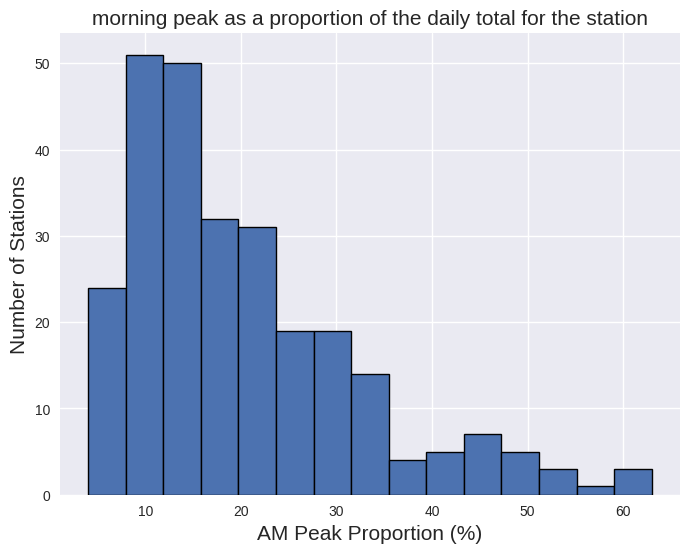

In [13]:
plt.style.use("seaborn")
ax=peak_counts["AMPeakCount"].plot(kind="hist",figsize=(8,6),bins=15,edgecolor="Black",linewidth=1)
ax.set_title("morning peak as a proportion of the daily total for the station",fontsize=15)
ax.set_xlabel("AM Peak Proportion (%)",fontsize=15)
ax.set_ylabel("Number of Stations",fontsize=15)
plt.show

***Plotting The PMPeak Count as a Histogram***

<ipython-input-14-430192be0408>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<function matplotlib.pyplot.show(close=None, block=None)>

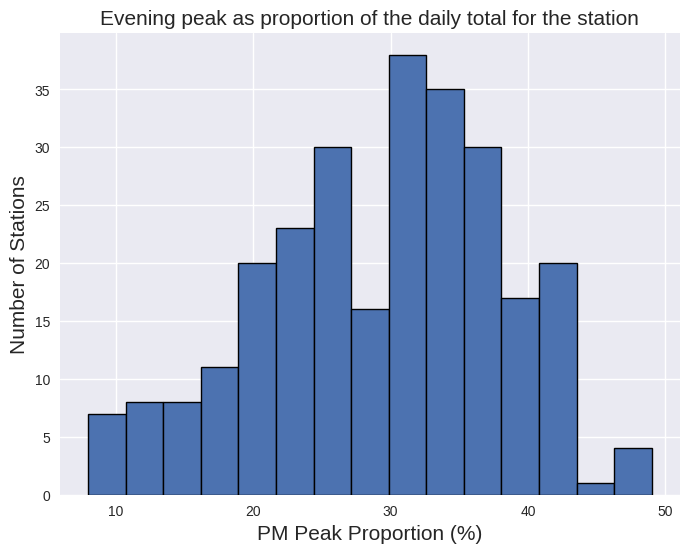

In [14]:
plt.style.use("seaborn")
ax=peak_counts["PMPeakCount"].plot(kind="hist",figsize=(8,6),bins=15,edgecolor="Black",linewidth=1)
ax.set_title("Evening peak as proportion of the daily total for the station",fontsize=15)
ax.set_xlabel("PM Peak Proportion (%)",fontsize=15)
ax.set_ylabel("Number of Stations",fontsize=15)
plt.show

### Section 2.C: Review And Comment On The Results of Distribution:

### Comment on Shape of Distribution:
**AMPeak Histogram:**

The results of the AMPeak histogram is a positively skewed graph since we have a mode at approximately 10% for 50 stations this suggests that more number stations have idle time with the station being only used at 10% of the total proportion, also few numbers of stations operate between 50% and 60% of peak proportion which suggests that these stations have the morning hours as extremely busy period there is more wide variety of stations with few stations extremely busy and some stations at idle.

**PMPeak Histogram:** 

In the histogram for PMPeak Proportion, the histogram has more values towards the right when compared with the AMPeak histogram. The histogram is approximately a negative skew but there is less variance, the mode of the histogram is between 30% and 35% for approximately 38 stations, some stations are extremely busy operating between 45 and 50% of peak proportion these stations have more travelers since its evening and these stations must be located near a residential area and number of stations are relatively idle operating between 8% and 15%.



### **Comment on Statistical Analysis:**
**AMPeakCount and PMPeakCount:** 

The minimum value for AMPeakCount is 4% and the maximum value is 63%. This implies that some stations have a large no of exits in the morning(63%) this station can be located near the work area and some stations have a low number of exits at 4% which can be of a residential area.
For the PMPeakCount a similar pattern is observed but the minimum value is slightly greater at 8% and the maximum value is slightly smaller at 49% for the residential area since the standard deviation of PMPeakCount is smaller at 8.8 as compared to the standard deviation of 12.2 of AMPeakCount hence in morning peak some stations are extremely busy with high load and some are idle where as in evening peak the load is very slightly distributed among stations, thus giving the range AMPeakCount as 59% and the range for PMPeakCount as 41%.

The first quartile for AMPeakCount is 11% the median value is 16% and third quartile is 26.25%, for the PMPeak count the first quartile is at 23.75% , the median value at 30% and the third quartile at 36%, the median value and quartile values are higher for PMPeak count suggesting more number of values for PMPeak count in this range

**AMPeak and PMPeak**:

The average number of exits at **all stations** during the morning peak can be observed from the chart as approximately mean=4550, similarly, the average number of exits in the evening peak at all stations is approximately mean=4478, these two values are very close which tells us that the overall average number of travelers on underground during the morning peak and evening peak is approximately equal. 


In [15]:
peak_counts.describe()

,AMPeak,PMPeak,TotalExits,AMPeakCount,PMPeakCount
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,20.208955,29.369403
std,8181.784059,6276.463316,23480.190142,12.221780,8.763311
min,27.000000,239.000000,596.000000,4.000000,8.000000
25%,677.500000,1471.750000,4889.500000,11.000000,23.750000
50%,1517.000000,2622.000000,9210.000000,16.000000,30.000000
75%,4315.250000,4707.750000,19999.500000,26.250000,36.000000
max,61116.000000,59486.000000,149258.000000,63.000000,49.000000


## Part 3: A Simple Classification of Stations

### 3.A: Creating Threshold For Categorisation of Stations:
We are calculating the percentage change between the AMPeak and PMPeak two if we have a positive percentage change this will imply that more number of passengers exit the station in the PMPeak. 

The justification behind this threshold is 50% is an apporpriate value since people travel on underground for other purposes apart from work and residential therefore smaller threshold would add up those travelers as well and give wrong results and since 50% is 1.5 times of AM Peak travellers would be travelling during PMPeak hence giving a significant number of more traveller. Value larger than 50% would be too high of a threshold.

**The Threshold that we use to classify the stations is:**

* if the percentage change is +50% or more the station would be categorised as `Residential` since we have significantly more exits in evening. 
* if the percentage change is -50% or less the station would be categorised as `Work` since we would have significantly more exits in the morning.
* else for the stations having percentage change between -50% to +50% the change is relatively small and AM peaks and PM peaks are approximately equal hence these stations would be classified as `Other`. 

### Section 3.B: Classifying Stations into Categories:

In [16]:
stations=peak_counts.loc[["Archway", "Balham", "Embankment", "Goodge Street", "Highgate", "High Barnet", "Leicester Square",
"Morden", "South Wimbledon", "Tottenham Court Road", "Warren Street"],["AMPeak","PMPeak"]].copy()

Calculating the Difference between the two peaks and the percentage change 

In [17]:
Difference=(stations.PMPeak)-(stations.AMPeak)
Percentage_Change=(Difference*100)//(stations.AMPeak)
stations=stations.assign(Difference=Difference,Percentage_Change=Percentage_Change)

The function below will help us to classify the stations

In [18]:
def stationCategory(row):
    if row.Percentage_Change >=50:
        return "Residential"
    elif row.Percentage_Change <=-50:
        return "Work"
    else:
        return "Other"

Applying the classification across all rows, the classifications are presented in the stations_category column and are defined as `Residential`,`Work`,`Other`

In [19]:
stations=stations.assign(Stations_Category=stations.apply(stationCategory, axis=1))
stations

,AMPeak,PMPeak,Difference,Percentage_Change,Stations_Category
Station,,,,,
Archway,2190,4106,1916,87,Residential
Balham,2637,7635,4998,189,Residential
Embankment,10692,8829,-1863,-18,Other
Goodge Street,5374,1949,-3425,-64,Work
Highgate,893,3170,2277,254,Residential
High Barnet,987,2362,1375,139,Residential
Leicester Square,8952,12915,3963,44,Other
Morden,1550,5955,4405,284,Residential
South Wimbledon,1335,2198,863,64,Residential


### Section 3.C: Comparing the Classification to Real World Data:

***From the London Underground tube data and google maps the predicted categories for our list of stations is given below:***

1.	Archway----North London: Residential
2.	Balham----South London: Residential
3.	Embankment----Central London: Work/Touristy Area
4.	Goodge Street----Central London: Work/Near a University
5.	High Gate----North London: Residential Area
6.	High Barnet----North London: Suburban Residential
7.	Leicester Square----Central London: Work/Touristy
8.	Morden----South London: Residential
9.	South Wimbledon----South West London: Residential
10.	Tottenham Court Road----Central London: Mainly Work/near oxford street
11.	Warren Street---- Central London: Work/Near a University

<br>
Sources:
https://tfl.gov.uk/maps/track/tube <br>
www.maps.google.co.uk

**Comparision of results:**

When comparing the table above with the calculated categories of station we can see that most of the calculated categorise are inline with the real world data apart from 3. Embankment 7. Leicester Square 10.Tottenham Court Road the calculation have categorised these area as other since there was smaller percentage change between AMPeaks and PMPeaks for these stations where as in real world data these area are considered as work area, but since these 3 areas are also popular among tourist which can explain the reason behind small change in morning and evening peak.